# Movie Recommendation System

For this project, I am going to use the Netflix Movies dataset for recommending the movies to the user.


### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Netflix Movie Dataset/netflix_data.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#filling the null places with blank spaces

data.fillna('', inplace = True)

In [ ]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,8807,4529,,2634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,8807,7693,,825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,8807,749,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8807,1768,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8807,18,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8807,221,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


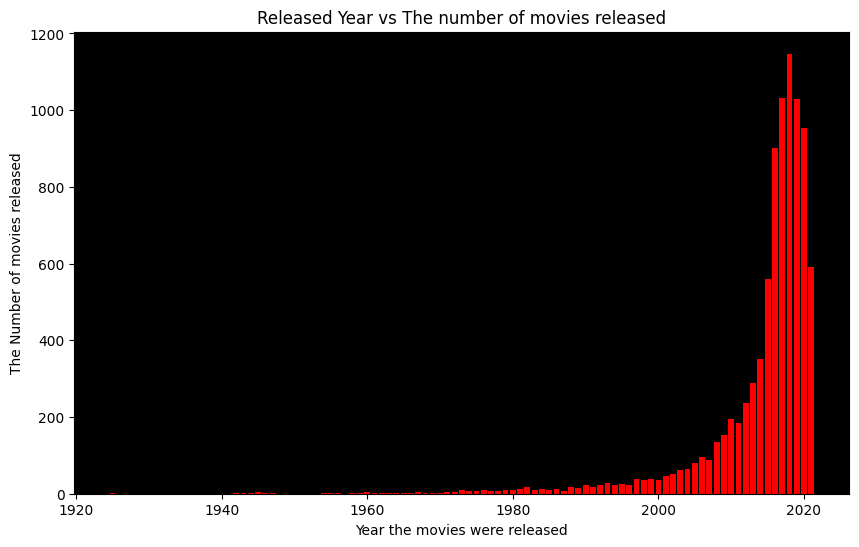

In [ ]:
# plotting the graph for the year vs the number of movies released that year

movie_count = data["release_year"].value_counts().sort_index()

plt.figure(figsize = (10,6))
plt.bar(movie_count.index, movie_count.values, color = "red")
plt.xlabel("Year the movies were released")
plt.ylabel("The Number of movies released")
plt.title("Released Year vs The number of movies released")

plt.gca().set_facecolor("black")

plt.show()

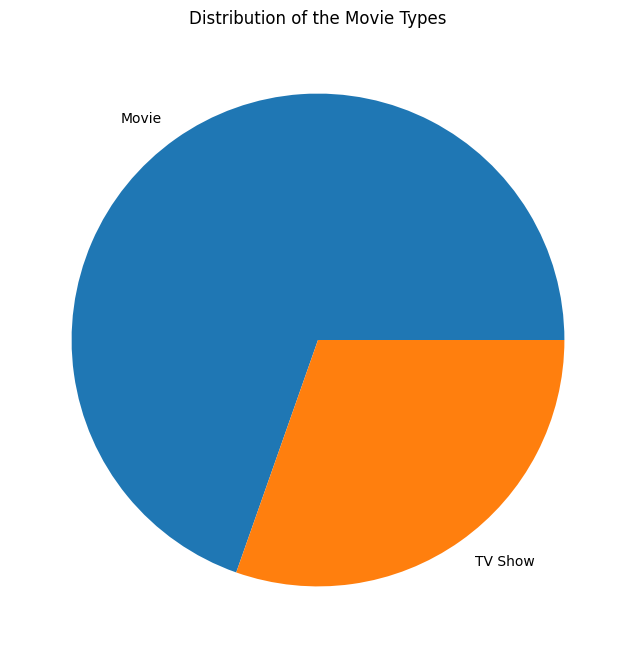

In [ ]:
#plotting the types of the movies stored in the dataset
type_count = data["type"].value_counts()

plt.figure(figsize = (8,8))
plt.pie(type_count, labels = type_count.index)
plt.title("Distribution of the Movie Types")

plt.show()

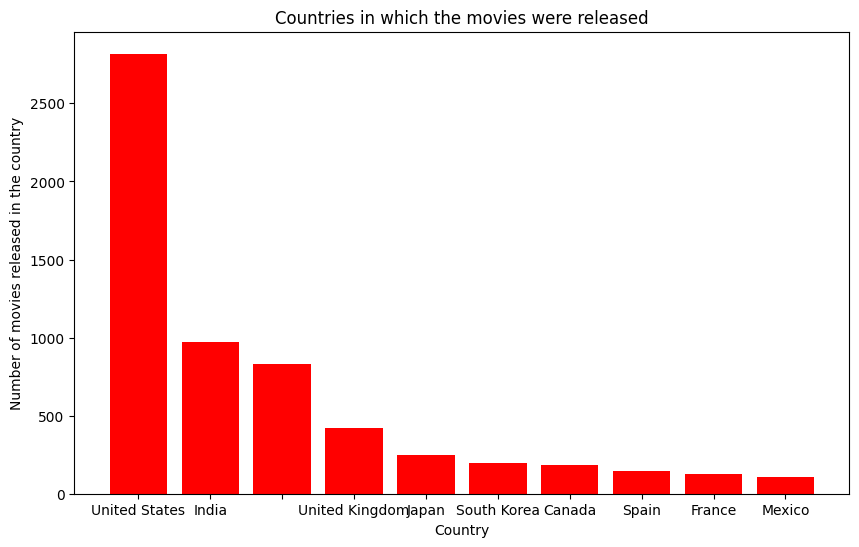

Index(['United States', 'India', '', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Mexico'],
      dtype='object')


In [ ]:
#Plotting the chart for the top countries from which the movie was released
top_countries = data["country"].value_counts().head(10)

plt.figure(figsize = (10,6))
plt.bar(top_countries.index, top_countries.values, color = 'red')
plt.title("Countries in which the movies were released")
plt.xlabel("Country")
plt.ylabel("Number of movies released in the country")
plt.show()
print(top_countries.index)

In [ ]:
#plotting the above chart in treemap
import pandas as pd
import plotly.express as px


# Count the occurrences of each country
top_countries = data['country'].value_counts().head(10)

# Create a DataFrame for plotting
top_countries_df = pd.DataFrame({'Country': top_countries.index, 'Count': top_countries.values})

# Plotting a treemap
fig = px.treemap(top_countries_df, path=['Country'], values='Count',
                 title='Top Countries in Which Movies Were Released',
                 color='Count', color_continuous_scale='reds')

# Show the plot
fig.show()


# Plot other details of the netflix data from the dataset

## Feature Engineering

In [ ]:
new_data = data[['title', 'type', 'director', 'cast', 'rating', 'listed_in', 'description']]
new_data.set_index('title')

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,Movie,Kirsten Johnson,,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
Blood & Water,TV Show,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
Jailbirds New Orleans,TV Show,,,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
Kota Factory,TV Show,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...
Zodiac,Movie,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
Zombie Dumb,TV Show,,,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
Zombieland,Movie,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [ ]:
import string

class text_cleaning:
  def separate_text(self, texts):
    unique_text = set()
    for text in texts.split(','):
      unique_text.add(text.strip().lower())
    return ' '.join(unique_text)

  def remove_space(self, texts):
    return texts.replace(' ',  '').lower()

  def remove_punctuation(self, texts):
    #first step is to cerate a translation table
    trans_table = str.maketrans('', '', string.punctuation)

    text = texts.translate(trans_table)

    return text

  def clean_text(self, texts):
    texts = self.separate_text(texts)
    texts = self.remove_space(texts)
    texts = self.remove_punctuation(texts)

    return texts

In [ ]:
cleaner = text_cleaning()

In [ ]:
new_data["type"] = new_data["type"].apply(cleaner.remove_space)
new_data["director"] = new_data["director"].apply(cleaner.separate_text)
new_data["cast"] = new_data["cast"].apply(cleaner.separate_text)
new_data["rating"] = new_data["rating"].apply(cleaner.remove_space)
new_data["listed_in"] = new_data["listed_in"].apply(cleaner.separate_text)
new_data["description"] = new_data["description"].apply(cleaner.remove_punctuation)

<ipython-input-16-c45a01692800>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-c45a01692800>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-c45a01692800>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-c45a016

In [ ]:
new_data.set_index('title', inplace = True)
new_data

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,movie,kirsten johnson,,pg-13,documentaries,As her father nears the end of his life filmma...
Blood & Water,tvshow,,thabang molaba gail mabalane cindy mahlangu am...,tv-ma,tv mysteries international tv shows tv dramas,After crossing paths at a party a Cape Town te...
Ganglands,tvshow,julien leclercq,tracy gotoas bakary diombera noureddine farihi...,tv-ma,tv action & adventure crime tv shows internati...,To protect his family from a powerful drug lor...
Jailbirds New Orleans,tvshow,,,tv-ma,reality tv docuseries,Feuds flirtations and toilet talk go down amon...
Kota Factory,tvshow,,revathi pillai mayur more urvi singh alam khan...,tv-ma,international tv shows tv comedies romantic tv...,In a city of coaching centers known to train I...
...,...,...,...,...,...,...
Zodiac,movie,david fincher,jake gyllenhaal dermot mulroney john carroll l...,r,thrillers dramas cult movies,A political cartoonist a crime reporter and a ...
Zombie Dumb,tvshow,,,tv-y7,kids' tv tv comedies korean tv shows,While living alone in a spooky town a young gi...
Zombieland,movie,ruben fleischer,abigail breslin derek graf amber heard jesse e...,r,comedies horror movies,Looking to survive in a world taken over by zo...


In [ ]:
new_data["text"] = new_data.apply(lambda row: ' '.join(row.dropna().values), axis = 1)
new_data.drop(new_data.columns[:-1], inplace = True, axis = 1)

<ipython-input-18-b04bdc6e4d96>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-b04bdc6e4d96>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
new_data

,text
title,
Dick Johnson Is Dead,movie kirsten johnson pg-13 documentaries As ...
Blood & Water,tvshow thabang molaba gail mabalane cindy mah...
Ganglands,tvshow julien leclercq tracy gotoas bakary dio...
Jailbirds New Orleans,tvshow tv-ma reality tv docuseries Feuds fli...
Kota Factory,tvshow revathi pillai mayur more urvi singh a...
...,...
Zodiac,movie david fincher jake gyllenhaal dermot mul...
Zombie Dumb,tvshow tv-y7 kids' tv tv comedies korean tv ...
Zombieland,movie ruben fleischer abigail breslin derek gr...


In [ ]:
tfid = TfidfVectorizer()
tfid_matrix = tfid.fit_transform(new_data["text"])

In [ ]:
cosin_sim = cosine_similarity(tfid_matrix, tfid_matrix)

In [ ]:
cosin_sim

array([[1.        , 0.00504833, 0.02011193, ..., 0.01065369, 0.02109898,
        0.03048859],
       [0.00504833, 1.        , 0.01714561, ..., 0.00103121, 0.        ,
        0.00481712],
       [0.02011193, 0.01714561, 1.        , ..., 0.00560911, 0.01042642,
        0.0333502 ],
       ...,
       [0.01065369, 0.00103121, 0.00560911, ..., 1.        , 0.05649084,
        0.00600011],
       [0.02109898, 0.        , 0.01042642, ..., 0.05649084, 1.        ,
        0.01046521],
       [0.03048859, 0.00481712, 0.0333502 , ..., 0.00600011, 0.01046521,
        1.        ]])

In [ ]:
np.save('tfid_matrix.npy', tfid_matrix)
np.save('cosin_sim_matrix.npy', cosin_sim)

In [ ]:
import pickle

with open('tfid_vectorizer.pkl', 'wb') as f:
  pickle.dump(tfid, f)

In [ ]:
final_data = data[['title', 'type']]

In [ ]:
final_data.head()

,title,type
0,Dick Johnson Is Dead,Movie
1,Blood & Water,TV Show
2,Ganglands,TV Show
3,Jailbirds New Orleans,TV Show
4,Kota Factory,TV Show


In [ ]:
final_data.to_csv("movie_data.csv", index=False)

In [ ]:
import re

class MovieHub:
  def __init__(self, cosin_sim, df):
    self.df = df
    self.cosin_sim = cosin_sim

  def recommendation(self, title, total_results = 5, threshold = 0.5):
    idx = self.find_id(title)
    self.df['similarity'] = self.cosin_sim[idx]
    sort_df = self.df.sort_values(by='similarity', ascending=False)[1:total_results+1]

    movies = sort_df['title'][sort_df['type'] == 'Movie']
    tv_shows = sort_df['title'][sort_df['type'] == 'TV Show']

    similar_movies = []
    similar_tv_shows = []

    for i, movie in enumerate(movies):
        similar_movies.append('{}. {}'.format(i+1, movie))

    for i, tv_show in enumerate(tv_shows):
        similar_tv_shows.append('{}. {}'.format(i+1, tv_show))

    return similar_movies, similar_tv_shows

  def find_id(self, name):
      for index, string in enumerate(self.df['title']):
          if re.search(name, string):
              return index
      return -1

In [38]:
recommender = MovieHub(cosin_sim, final_data)
movies, tv_shows = recommender.recommendation('Blood & Water', total_results=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)


Similar Movie(s) list:
1. Shirkers
2. Frank and Cindy
3. Adam: His Song Continues
4. Walk Away from Love
5. Mom

Similar TV_show(s) list:
1. Diamond City
2. Kings of Jo'Burg
3. Lion Pride
4. Forget Me Not
5. Horrid Henry


<ipython-input-31-e4600d4f6be5>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

